In [220]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

from pprint import pprint

In [159]:
jacket = pd.read_excel('data/sizing.xlsx', sheet_name=1)

In [189]:
jacket.replace(0, np.nan, inplace=True)

In [193]:
jacket.dropna(inplace=True)

In [160]:
jacket.columns

Index(['OrderNo', 'BehindClothLengthBody', 'FrontClothLengthBody',
       'ShoulderWidthBody', 'BustBody', 'AbdomenBody', 'LeftSleeveLengthBody',
       'RightSleeveLengthBody', 'WristBody', 'BehindClothLengthSetNumber',
       'FrontClothLengthSetNumber', 'ShoulderWidthSetNumber', 'BustSetNumber',
       'AbdomenSetNumber', 'HemSetNumber', 'LeftSleeveLengthSetNumber',
       'RightSleeveLengthSetNumber', 'Wrist finish'],
      dtype='object')

In [161]:
X1 = jacket[['ShoulderWidthBody', 'BustBody', 'WristBody']]
X2 = jacket[['BehindClothLengthBody', 'FrontClothLengthBody', 'ShoulderWidthBody', 'BustBody', 'AbdomenBody', \
                          'LeftSleeveLengthBody', 'RightSleeveLengthBody', 'WristBody']]
y = jacket[['BehindClothLengthSetNumber', 'FrontClothLengthSetNumber', 'ShoulderWidthSetNumber', 'BustSetNumber', 'AbdomenSetNumber', \
                       'HemSetNumber', 'LeftSleeveLengthSetNumber', 'RightSleeveLengthSetNumber', 'Wrist finish']]

In [207]:
def split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [235]:
X1_train, X1_test, y1_train, y1_test = split(X1, X2)
X2_train, X2_test, y2_train, y2_test = split(X2, y)
from_3 = rand_grid_search(X1_train, y1_train)
to_all = rand_grid_search(X2_train, y2_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   36.5s finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   27.3s finished


In [237]:
from_3.fit(X1_train, y1_train)
to_all.fit(X2_train, y2_train)

RandomForestRegressor(max_depth=30, max_features=2, min_samples_split=4,
                      n_estimators=447)

In [271]:
from_3.score(X1_test, y1_test)

0.8816067016504446

In [272]:
to_all.score(X2_test, y2_test)

0.30239131864072255

In [273]:
only3_model_rand.score(X1_test, y2_test)

0.1596519328761033

In [288]:
predict = (np.array([42, 110, 17]).reshape(1, -1))

In [285]:
test = from_3.predict(predict)
test

array([[ 65.98688932,  73.51065785,  44.29222828, 108.21540609,
        102.06490947,  59.18292463,  59.18292463,  18.09082074]])

In [289]:
to_all.predict(from_3.predict(predict))

array([[ 70.1000253 ,  73.75782865,  46.33865186, 114.57592948,
        101.44016139, 112.43176867,  59.17550868,  59.18615372,
         28.6706802 ]])

In [291]:
only3_model_rand.predict(predict)

array([[ 71.258347  ,  74.77688373,  45.25676088, 116.95267798,
        103.31829923, 114.6253392 ,  59.35165918,  59.35149404,
         29.18876147]])

In [290]:
only3_model_base = rf.fit(X1_train, y2_train)

In [292]:
evaluate(only3_model_rand, X1_test, y2_test);

Model Performance
Average Error: 
BehindClothLengthSetNumber     3.812770
FrontClothLengthSetNumber      2.872804
ShoulderWidthSetNumber         1.269391
BustSetNumber                  3.210141
AbdomenSetNumber               5.914386
HemSetNumber                  10.901167
LeftSleeveLengthSetNumber      3.297376
RightSleeveLengthSetNumber     3.314144
Wrist finish                   1.127861
dtype: float64 degrees.
Accuracy = 
BehindClothLengthSetNumber         -inf
FrontClothLengthSetNumber     31.861457
ShoulderWidthSetNumber        57.323545
BustSetNumber                 87.507725
AbdomenSetNumber                   -inf
HemSetNumber                       -inf
LeftSleeveLengthSetNumber          -inf
RightSleeveLengthSetNumber         -inf
Wrist finish                  72.359114
dtype: float64%.


In [255]:
only3_model_rand = rand_grid_search(X1_train, y2_train)
only3_model_rand.fit(X1_train, y2_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   33.1s finished


RandomForestRegressor(max_depth=90, max_features=2, min_samples_split=4,
                      n_estimators=668)

In [257]:
evaluate(only3_model_rand, X1_test, y2_test);

Model Performance
Average Error: 
BehindClothLengthSetNumber     3.812770
FrontClothLengthSetNumber      2.872804
ShoulderWidthSetNumber         1.269391
BustSetNumber                  3.210141
AbdomenSetNumber               5.914386
HemSetNumber                  10.901167
LeftSleeveLengthSetNumber      3.297376
RightSleeveLengthSetNumber     3.314144
Wrist finish                   1.127861
dtype: float64 degrees.
Accuracy = 
BehindClothLengthSetNumber         -inf
FrontClothLengthSetNumber     31.861457
ShoulderWidthSetNumber        57.323545
BustSetNumber                 87.507725
AbdomenSetNumber                   -inf
HemSetNumber                       -inf
LeftSleeveLengthSetNumber          -inf
RightSleeveLengthSetNumber         -inf
Wrist finish                  72.359114
dtype: float64%.


In [219]:
y_pred = to_all.predict(from_3.predict(X1_test))

In [233]:
cross_val_score(to_all, X1, y)

array([0.34993915, 0.3547325 , 0.3103995 , 0.14851771, 0.36841652])

In [232]:
cross_val_score(to_all, y2_test, y_pred, cv=5)

array([0.69117508, 0.13470721, 0.75921298, 0.68113718, 0.61737174])

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X1, X2, test_size=.2, random_state=0)

In [197]:
df = DecisionTreeRegressor()
df.fit(X_train, y_train)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [199]:
evaluate(df, X_test, y_test);

Model Performance
Average Error: 
BehindClothLengthBody    3.124067
FrontClothLengthBody     2.105856
ShoulderWidthBody        0.418919
BustBody                 0.354955
AbdomenBody              4.195710
LeftSleeveLengthBody     2.871343
RightSleeveLengthBody    2.700172
WristBody                1.004505
dtype: float64 degrees.
Accuracy = 
BehindClothLengthBody         -inf
FrontClothLengthBody     95.961944
ShoulderWidthBody        97.040343
BustBody                 97.666362
AbdomenBody              92.886002
LeftSleeveLengthBody     94.182934
RightSleeveLengthBody         -inf
WristBody                96.519564
dtype: float64%.


In [196]:
best_random = rand_grid_search(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   31.4s finished


In [200]:
best_random.score(X_test, y_test)

0.8821205677173342

In [201]:
rf.score(X_test, y_test)

0.8777684110206041

In [204]:
random_accuracy = evaluate(best_random, X_test, y_test);

Model Performance
Average Error: 
BehindClothLengthBody    3.036854
FrontClothLengthBody     1.815056
ShoulderWidthBody        0.380712
BustBody                 0.328195
AbdomenBody              4.006124
LeftSleeveLengthBody     2.456476
RightSleeveLengthBody    2.550310
WristBody                0.944349
dtype: float64 degrees.
Accuracy = 
BehindClothLengthBody         -inf
FrontClothLengthBody     96.394628
ShoulderWidthBody        93.786415
BustBody                 97.693350
AbdomenBody              93.271116
LeftSleeveLengthBody     94.984638
RightSleeveLengthBody         -inf
WristBody                96.889525
dtype: float64%.


In [205]:
base_accuracy = evaluate(rf, X_test, y_test);

Model Performance
Average Error: 
BehindClothLengthBody    2.948042
FrontClothLengthBody     1.803402
ShoulderWidthBody        0.340414
BustBody                 0.241351
AbdomenBody              3.827302
LeftSleeveLengthBody     2.631955
RightSleeveLengthBody    2.547918
WristBody                0.959730
dtype: float64 degrees.
Accuracy = 
BehindClothLengthBody         -inf
FrontClothLengthBody     96.414199
ShoulderWidthBody        97.675490
BustBody                 97.783008
AbdomenBody              93.452390
LeftSleeveLengthBody     94.634526
RightSleeveLengthBody         -inf
WristBody                96.811074
dtype: float64%.


In [206]:
print('Improvement of \n{}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy));

Improvement of 
BehindClothLengthBody         NaN
FrontClothLengthBody    -0.020299
ShoulderWidthBody       -3.981629
BustBody                -0.091690
AbdomenBody             -0.193975
LeftSleeveLengthBody     0.369962
RightSleeveLengthBody         NaN
WristBody                0.081036
dtype: float64%.


In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: \n{} degrees.'.format(np.mean(errors)))
    print('Accuracy = \n{}%.'.format(accuracy))
    
    return accuracy

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_train)

In [86]:
y_test.shape

(111, 9)

In [87]:
X_train.shape

(443, 8)

In [68]:
xpca = PCA(n_components=8)
xpca.fit(X_scaled)
X_pca = xpca.transform(X_scaled)
ypca = PCA(n_components=9)
ypca.fit(y_scaled)

PCA(n_components=9)

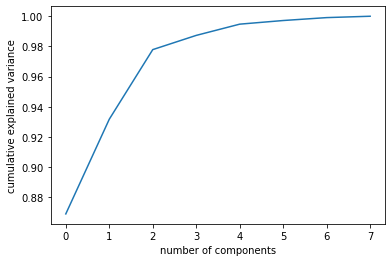

In [94]:
plt.plot(np.cumsum(xpca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [44]:
def scree_plot(ax, pca, n_components_to_plot=8, title=None):
    """Make a scree plot showing the variance explained (i.e. variance
    of the projections) for the principal components in a fit sklearn
    PCA object.
    
    Parameters
    ----------
    ax: matplotlib.axis object
      The axis to make the scree plot on.
      
    pca: sklearn.decomposition.PCA object.
      A fit PCA object.
      
    n_components_to_plot: int
      The number of principal components to display in the scree plot.
      
    title: str
      A title for the scree plot.
    """
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    ax.plot(ind, vals, color='blue')
    ax.scatter(ind, vals, color='blue', s=50)

    for i in range(num_components):
        ax.annotate(r"{:2.2f}%".format(vals[i]), 
            (ind[i]+0.2, vals[i]+0.005), 
            va="bottom", 
            ha="center", 
            fontsize=12)

    ax.set_xticklabels(ind, fontsize=12)
    ax.set_ylim(0, max(vals) + 0.05)
    ax.set_xlim(0 - 0.45, n_components_to_plot + 0.45)
    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=16)
    
    

/Users/joshchow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator


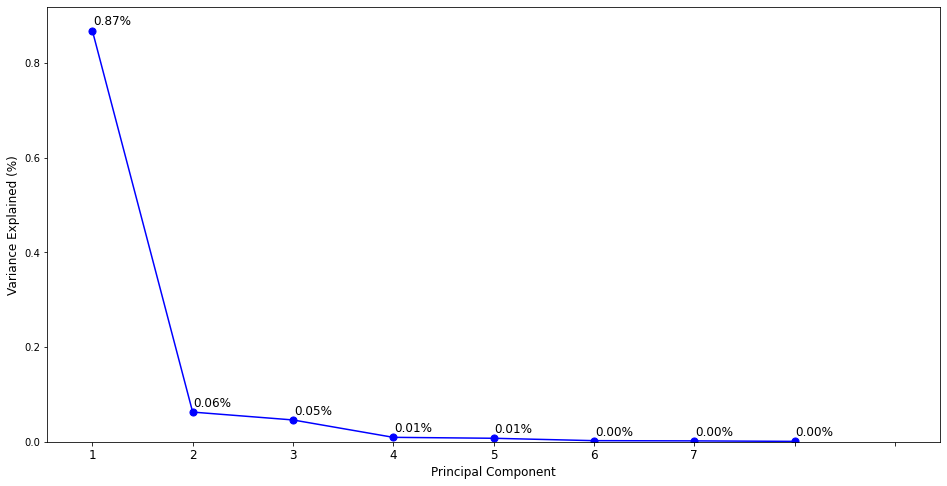

In [62]:
fig, ax = plt.subplots(figsize=(16,8))
scree_plot(ax, xpca)

/Users/joshchow/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator


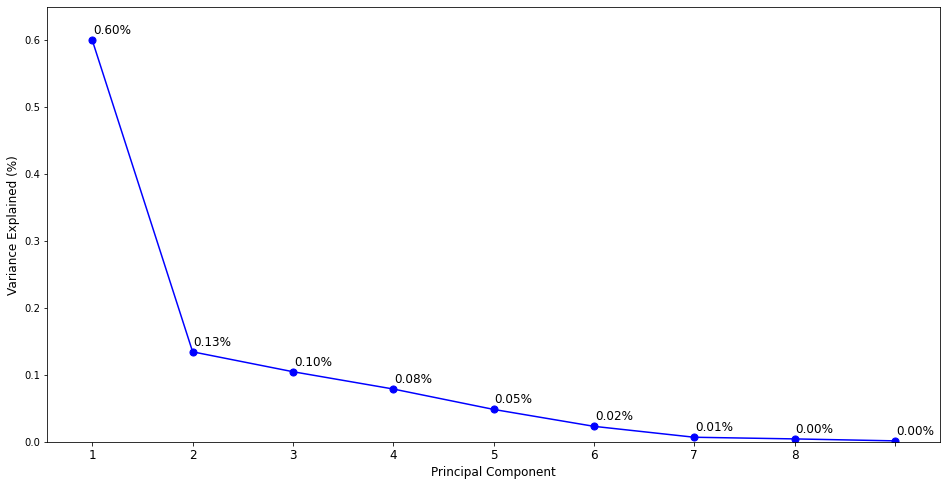

In [63]:
fig, ax = plt.subplots(figsize=(16,8))
scree_plot(ax, ypca)

In [90]:
pca = PCA(n_components=2)
Xpca2 = pca.fit_transform(X)

In [92]:
Xpca2.shape

(554, 2)

In [74]:
rf = RandomForestRegressor()

In [77]:
dt = DecisionTreeRegressor()

In [79]:
base_rf = rf.fit(X, y)

In [97]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = [1,2,3,4,5,6]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': [1, 2, 3, 4, 5, 6],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [5, 115, 226, 336, 447, 557, 668, 778, 889, 1000]}


In [188]:
len(X1.columns)

3

In [168]:
def rand_grid_search(X, y):
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 5, stop = 1000, num = 10)]
    # Number of features to consider at every split
    max_features = [1,2,3,4,5,6]
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 4, 6]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 3]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]

    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestRegressor()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_train, y_train)
    return rf_random.best_estimator_

In [293]:
model = rand_grid_search(X1, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   32.3s finished


In [101]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   53.8s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': [1, 2, 3, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [5, 115, 226, 336, 447,
                                                         557, 668, 778, 889,
                                                         1000]},
                   random_state=42, verbose=2)

In [108]:
rf_random.best_params_

{'n_estimators': 336,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 2,
 'max_depth': 80,
 'bootstrap': True}

In [110]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [60, 70, 80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10],
    'n_estimators': [np.linspace(300, 350, 5)]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [118]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

Text(0.5, 1.0, 'Accuracy vs Num Trees')

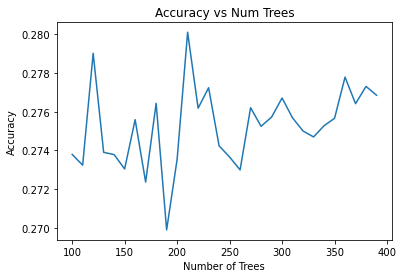

In [124]:
num_trees = range(100, 400, 10)
accuracies = []
for n in num_trees:
    tot = 0
    for i in range(5):
        rf = RandomForestRegressor(n_estimators=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
fig, ax = plt.subplots()
ax.plot(num_trees, accuracies)
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Accuracy")
ax.set_title('Accuracy vs Num Trees')

In [125]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: \n{} degrees.'.format(np.mean(errors)))
    print('Accuracy = \n{}%.'.format(accuracy))
    
    return accuracy

In [134]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [135]:
evaluate(dt, X_test, y_test);

Model Performance
Average Error: 
BehindClothLengthSetNumber     1.936980
FrontClothLengthSetNumber      1.861596
ShoulderWidthSetNumber         1.650219
BustSetNumber                  3.564093
AbdomenSetNumber               4.029601
HemSetNumber                  13.728443
LeftSleeveLengthSetNumber      1.916817
RightSleeveLengthSetNumber     2.178078
Wrist finish                   1.189189
dtype: float64 degrees.
Accuracy = 
BehindClothLengthSetNumber    35.043526
FrontClothLengthSetNumber     33.301168
ShoulderWidthSetNumber        57.144995
BustSetNumber                 87.645772
AbdomenSetNumber              67.603260
HemSetNumber                       -inf
LeftSleeveLengthSetNumber          -inf
RightSleeveLengthSetNumber         -inf
Wrist finish                  73.394126
dtype: float64%.


In [137]:
evaluate(rf, X_test, y_test);

Model Performance
Average Error: 
BehindClothLengthSetNumber     2.075736
FrontClothLengthSetNumber      1.720941
ShoulderWidthSetNumber         1.676190
BustSetNumber                  3.525503
AbdomenSetNumber               3.538593
HemSetNumber                  11.840262
LeftSleeveLengthSetNumber      1.871185
RightSleeveLengthSetNumber     2.046188
Wrist finish                   1.172928
dtype: float64 degrees.
Accuracy = 
BehindClothLengthSetNumber         -inf
FrontClothLengthSetNumber     33.968705
ShoulderWidthSetNumber        57.439007
BustSetNumber                 87.537874
AbdomenSetNumber                   -inf
HemSetNumber                       -inf
LeftSleeveLengthSetNumber          -inf
RightSleeveLengthSetNumber         -inf
Wrist finish                  72.964832
dtype: float64%.


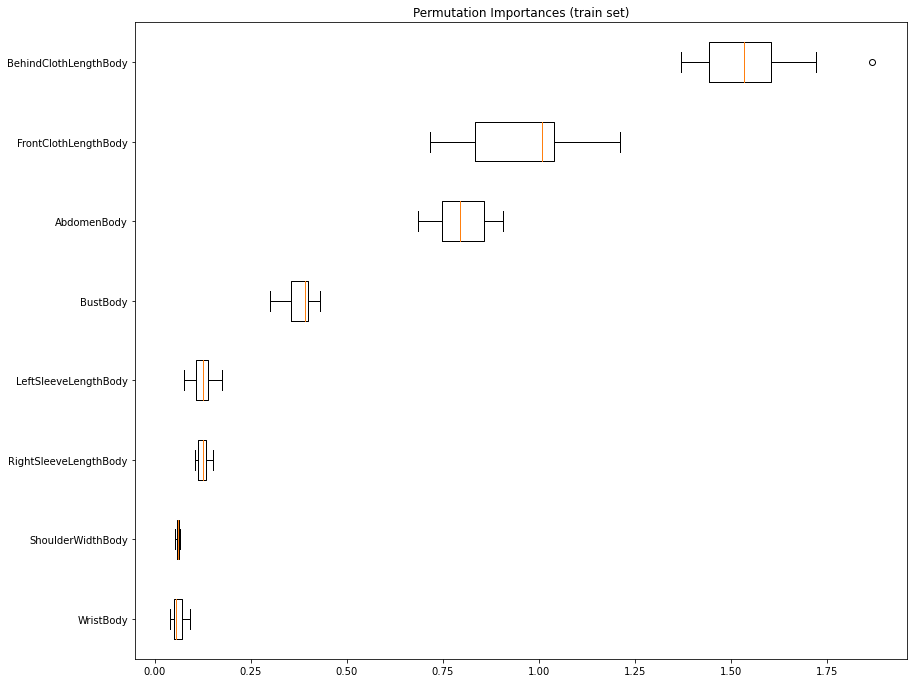

In [140]:
from sklearn.inspection import permutation_importance

result = permutation_importance(dt, X_train, y_train, n_repeats=10, random_state=11, n_jobs=-1)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(6.4*2,4.8*2), tight_layout=True)
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
plt.show()

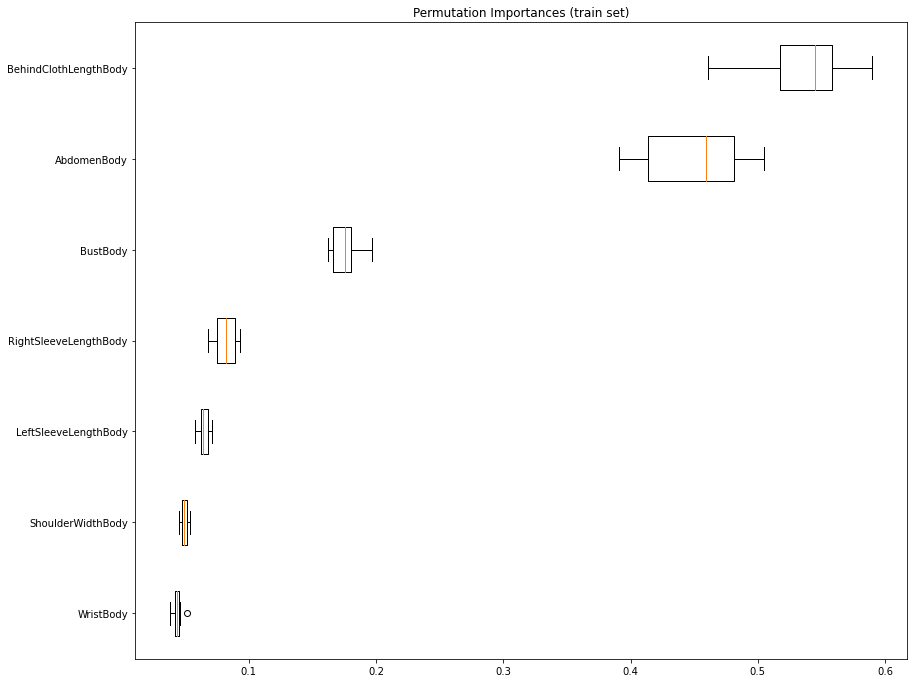

In [152]:
result = permutation_importance(rf, X_train, y_train, n_repeats=10, random_state=11, n_jobs=-1)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(6.4*2,4.8*2), tight_layout=True)
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
plt.show()

In [144]:
X_train.drop(columns='FrontClothLengthBody', inplace=True)

/Users/joshchow/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [149]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [157]:
evaluate(rf, X_test, y_test);

Model Performance
Average Error: 
BehindClothLengthSetNumber     2.171844
FrontClothLengthSetNumber      1.916707
ShoulderWidthSetNumber         1.606858
BustSetNumber                  3.478886
AbdomenSetNumber               3.538586
HemSetNumber                  11.420370
LeftSleeveLengthSetNumber      1.827472
RightSleeveLengthSetNumber     1.992408
Wrist finish                   1.182169
dtype: float64 degrees.
Accuracy = 
BehindClothLengthSetNumber         -inf
FrontClothLengthSetNumber     33.356282
ShoulderWidthSetNumber        57.358783
BustSetNumber                 87.539167
AbdomenSetNumber                   -inf
HemSetNumber                       -inf
LeftSleeveLengthSetNumber          -inf
RightSleeveLengthSetNumber         -inf
Wrist finish                  72.803455
dtype: float64%.


In [155]:
X_test.drop(columns='FrontClothLengthBody', inplace=True)

/Users/joshchow/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
